# About Dataset

# Descripton and Background Data

- **Context**
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

- **Content**
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
- Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

- **Inspiration**
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

- **Tasks to Solve** :
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

**About this file** 

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Content  
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-

train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv

Detailed Column Descriptions
bank client data:

1. - age (numeric)
2. - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3. - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. - education (categorical: "unknown","secondary","primary","tertiary")
5. - default: has credit in default? (binary: "yes","no")
6. - balance: average yearly balance, in euros (numeric)
7. - housing: has housing loan? (binary: "yes","no")
8. - loan: has personal loan? (binary: "yes","no")
- related with the last contact of the current campaign:
9. - contact: contact communication type (categorical: "unknown","telephone","cellular")
10. - day: last contact day of the month (numeric)
11. - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. - duration: last contact duration, in seconds (numeric)
- other attributes:
13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. - previous: number of contacts performed before this campaign and for this client (numeric)
16. - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- Output variable (desired target):
17.  - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

## Import Library and Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
df = pd.read_csv('train.csv', sep=';')

In [3]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1353,40,blue-collar,married,primary,no,968,yes,yes,unknown,8,may,213,1,-1,0,unknown,no
9587,35,blue-collar,divorced,primary,no,-5,no,no,unknown,6,jun,48,5,-1,0,unknown,no
19495,47,technician,married,tertiary,no,3690,no,no,cellular,7,aug,228,2,-1,0,unknown,no
36376,38,blue-collar,married,secondary,no,1370,yes,no,cellular,11,may,472,2,-1,0,unknown,no
16390,32,management,single,secondary,no,131,yes,yes,cellular,23,jul,1152,2,-1,0,unknown,yes


In [4]:
df.shape

(45211, 17)

## Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
nums = df.select_dtypes(include=np.number).columns
cats = df.select_dtypes(exclude=np.number).columns

In [7]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [8]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## Handling Missing Values

### Check Null

In [9]:
miss_cols = df.columns[df.isnull().any()]
missing_df = df[miss_cols].isnull().sum()
print(missing_df)

Series([], dtype: float64)


In [10]:
df.isna().sum()
for i in df.columns:
    print(f'Missing value pada kolom {i} sebanyak {(df[i].isna().sum())}, dengan persentase {round(((df[i].isna().sum())/(len(df))*100),2)}%')

Missing value pada kolom age sebanyak 0, dengan persentase 0.0%
Missing value pada kolom job sebanyak 0, dengan persentase 0.0%
Missing value pada kolom marital sebanyak 0, dengan persentase 0.0%
Missing value pada kolom education sebanyak 0, dengan persentase 0.0%
Missing value pada kolom default sebanyak 0, dengan persentase 0.0%
Missing value pada kolom balance sebanyak 0, dengan persentase 0.0%
Missing value pada kolom housing sebanyak 0, dengan persentase 0.0%
Missing value pada kolom loan sebanyak 0, dengan persentase 0.0%
Missing value pada kolom contact sebanyak 0, dengan persentase 0.0%
Missing value pada kolom day sebanyak 0, dengan persentase 0.0%
Missing value pada kolom month sebanyak 0, dengan persentase 0.0%
Missing value pada kolom duration sebanyak 0, dengan persentase 0.0%
Missing value pada kolom campaign sebanyak 0, dengan persentase 0.0%
Missing value pada kolom pdays sebanyak 0, dengan persentase 0.0%
Missing value pada kolom previous sebanyak 0, dengan persentase

In [11]:
# Loop untuk setiap kolom dalam DataFrame
for column in df.columns:
    # Mengecek jumlah nilai yang hanya terdiri dari spasi ganda di setiap kolom
    spasi_ganda_check = (df[column].astype(str).str.strip() == '').sum()
    
    # Mencetak hasil jika terdapat nilai spasi ganda di suatu kolom
    if spasi_ganda_check > 0:
        print(f"Kolom '{column}' memiliki {spasi_ganda_check} nilai yang hanya spasi ganda.")
    else:
        print(f"Tidak ada nilai yang hanya spasi ganda di kolom '{column}'.")

Tidak ada nilai yang hanya spasi ganda di kolom 'age'.
Tidak ada nilai yang hanya spasi ganda di kolom 'job'.


Tidak ada nilai yang hanya spasi ganda di kolom 'marital'.
Tidak ada nilai yang hanya spasi ganda di kolom 'education'.
Tidak ada nilai yang hanya spasi ganda di kolom 'default'.
Tidak ada nilai yang hanya spasi ganda di kolom 'balance'.
Tidak ada nilai yang hanya spasi ganda di kolom 'housing'.
Tidak ada nilai yang hanya spasi ganda di kolom 'loan'.
Tidak ada nilai yang hanya spasi ganda di kolom 'contact'.
Tidak ada nilai yang hanya spasi ganda di kolom 'day'.
Tidak ada nilai yang hanya spasi ganda di kolom 'month'.
Tidak ada nilai yang hanya spasi ganda di kolom 'duration'.
Tidak ada nilai yang hanya spasi ganda di kolom 'campaign'.
Tidak ada nilai yang hanya spasi ganda di kolom 'pdays'.
Tidak ada nilai yang hanya spasi ganda di kolom 'previous'.
Tidak ada nilai yang hanya spasi ganda di kolom 'poutcome'.
Tidak ada nilai yang hanya spasi ganda di kolom 'y'.


### Check Duplicate

In [12]:
print('There is',df.duplicated().sum(),'duplicated value')

There is 0 duplicated value


# Data Preparation

In [13]:
df_prep = df.copy()

In [14]:
df_prep.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Handling Irregular Data

In [15]:
pd.set_option('display.max_rows', 5000)
for i in df_prep.columns:
    print(f'''Value count kolom {i}:''')
    print(df_prep[i].value_counts())
    print()

Value count kolom age:
32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
26     805
56     778
59     770
58     740
60     596
25     527
24     302
23     202
61     147
22     129
62      80
21      79
63      77
64      74
70      67
66      63
65      59
71      54
67      54
72      52
20      50
73      44
77      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
86       9
84       9
85       5
87       4
89       3
92       2
93       2
90       2
95       2
88       2
94       1
Name: age, dtype: int64

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.          

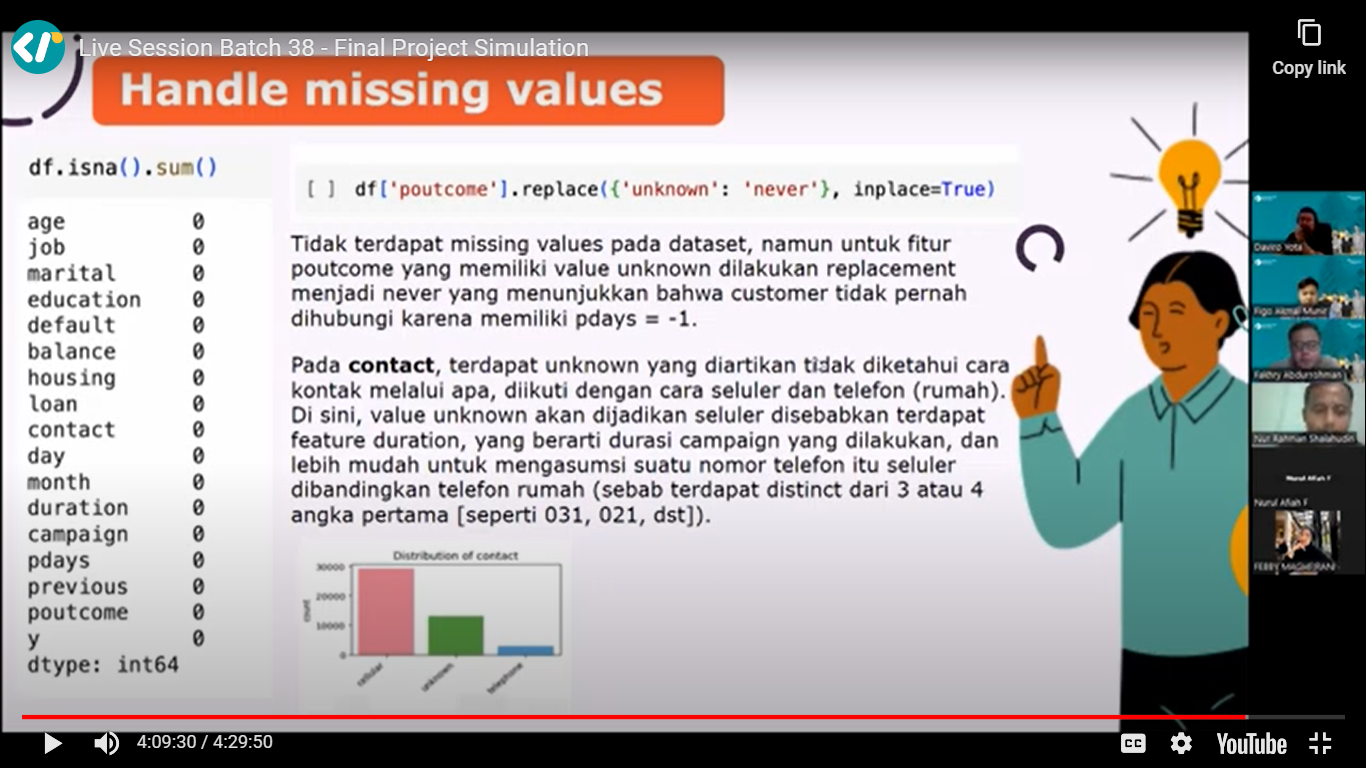
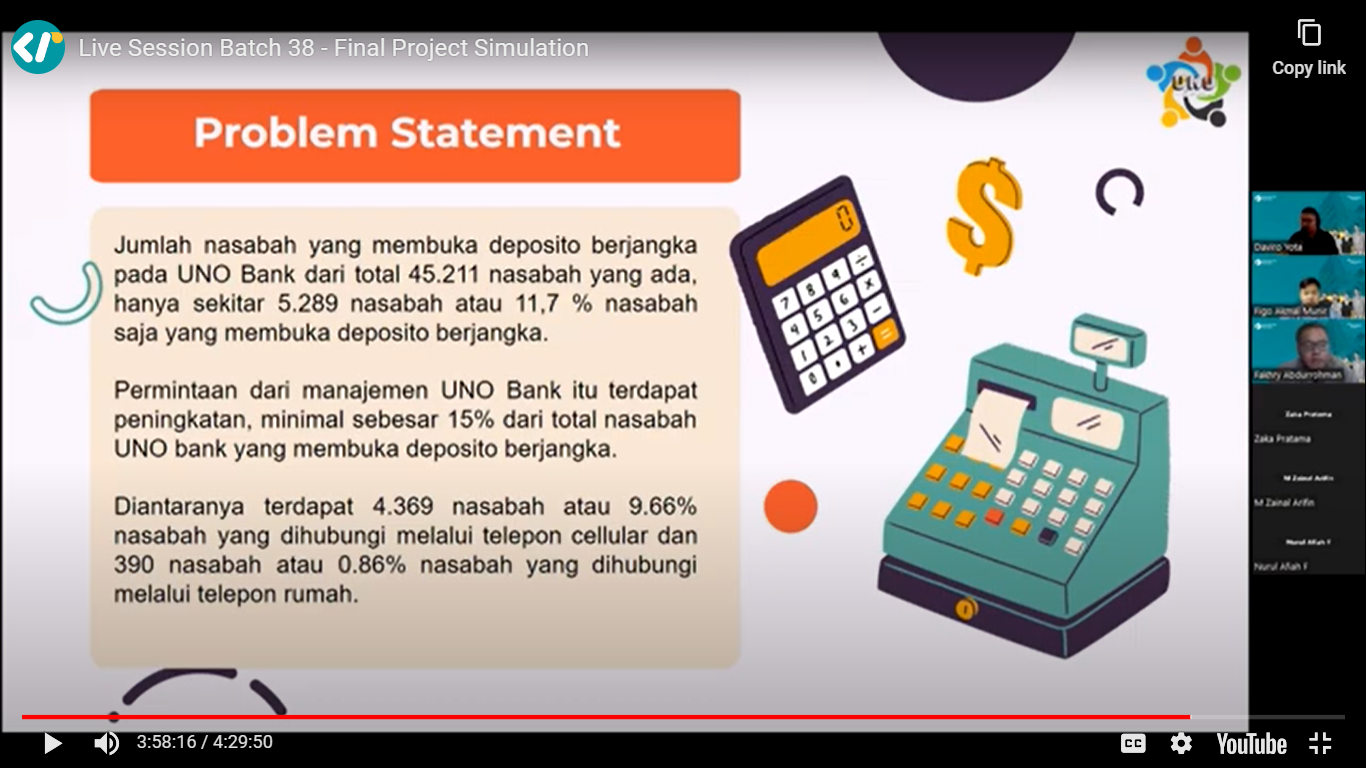
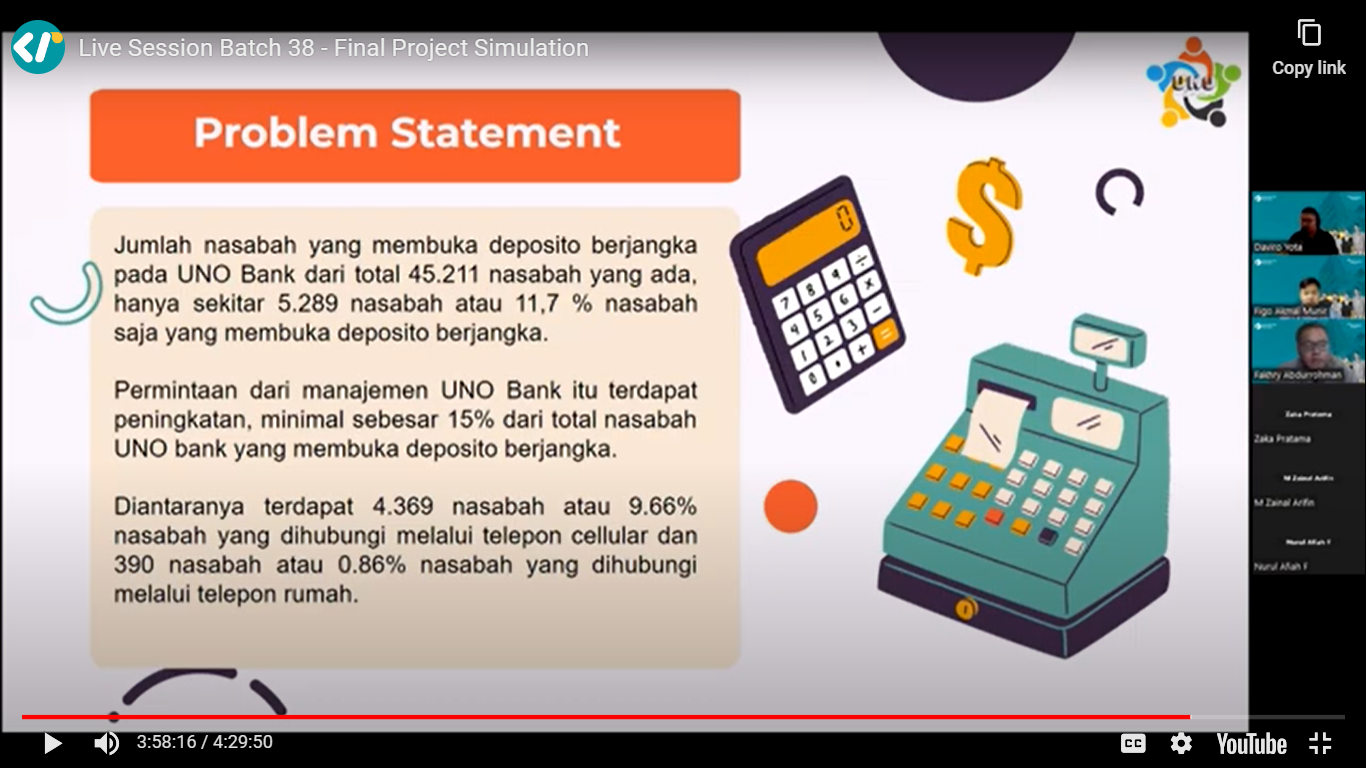
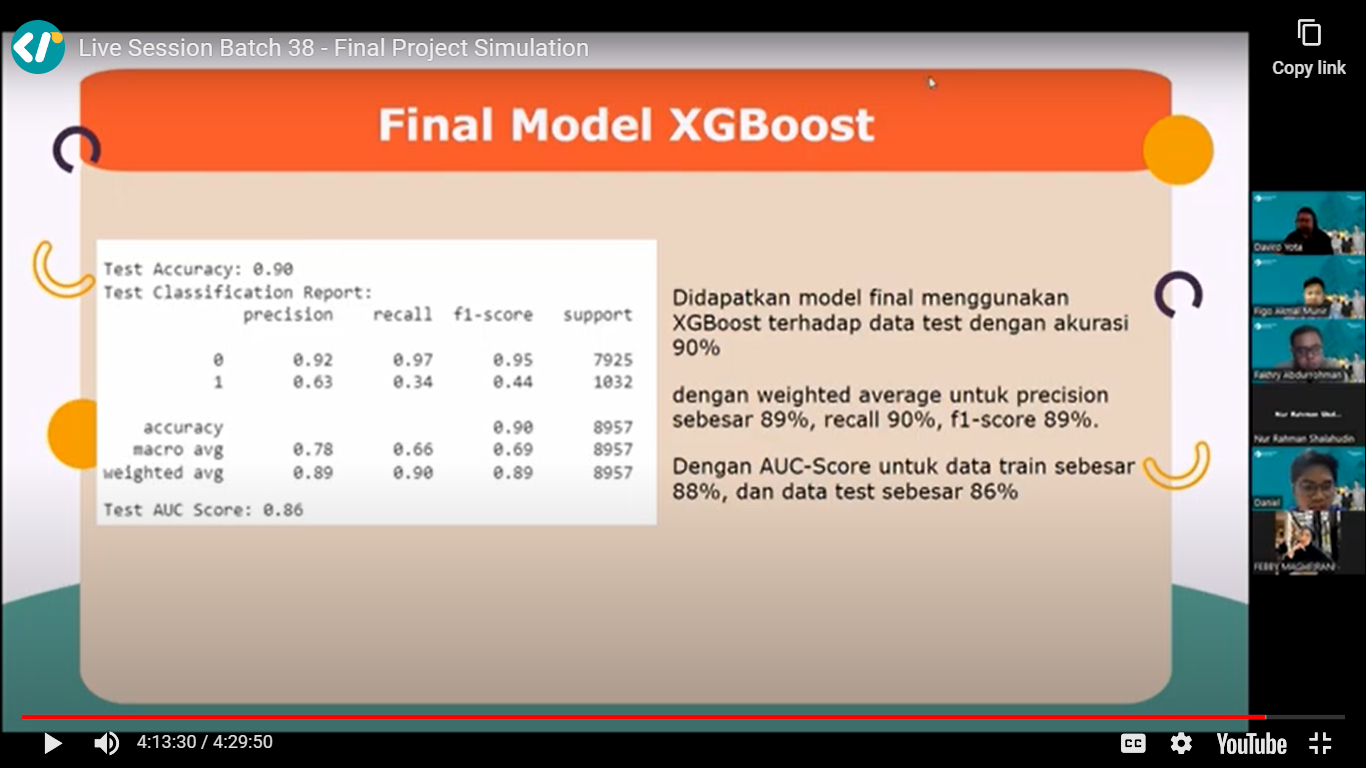
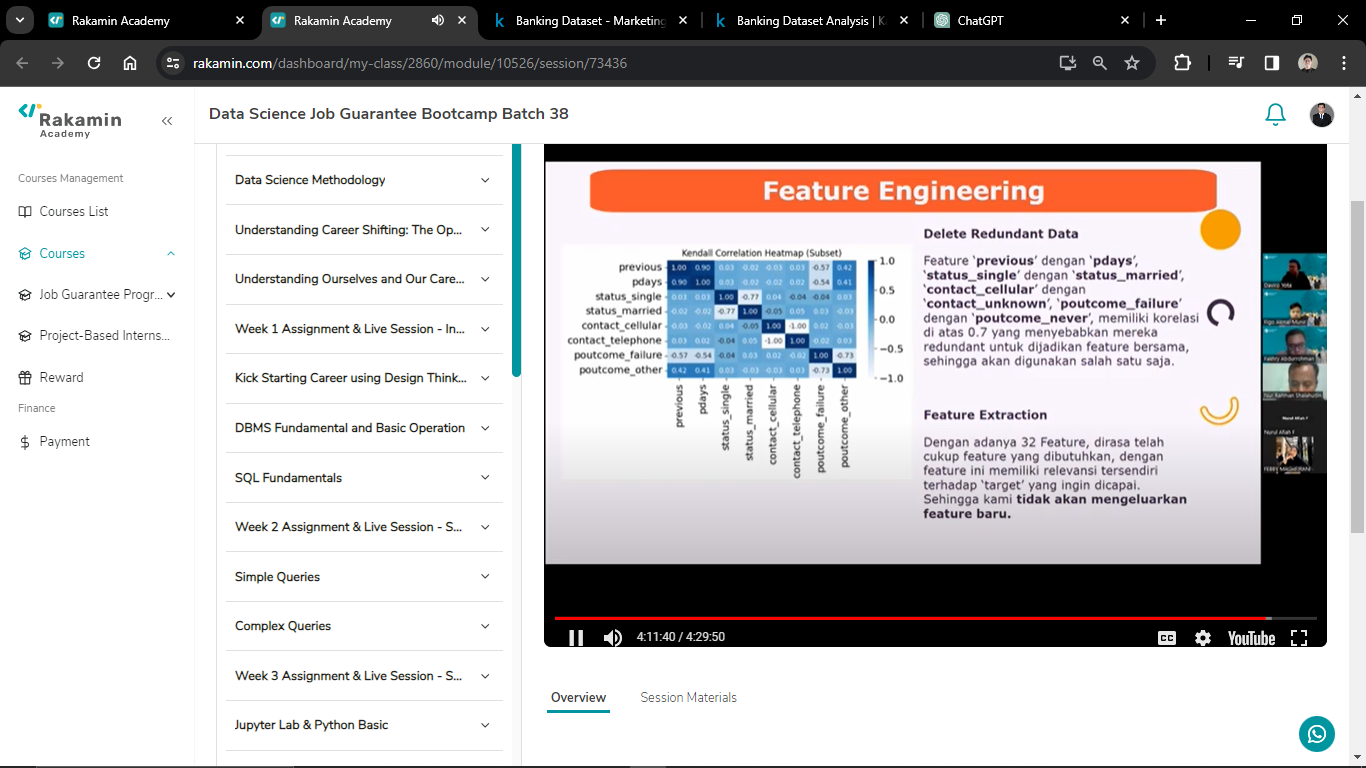

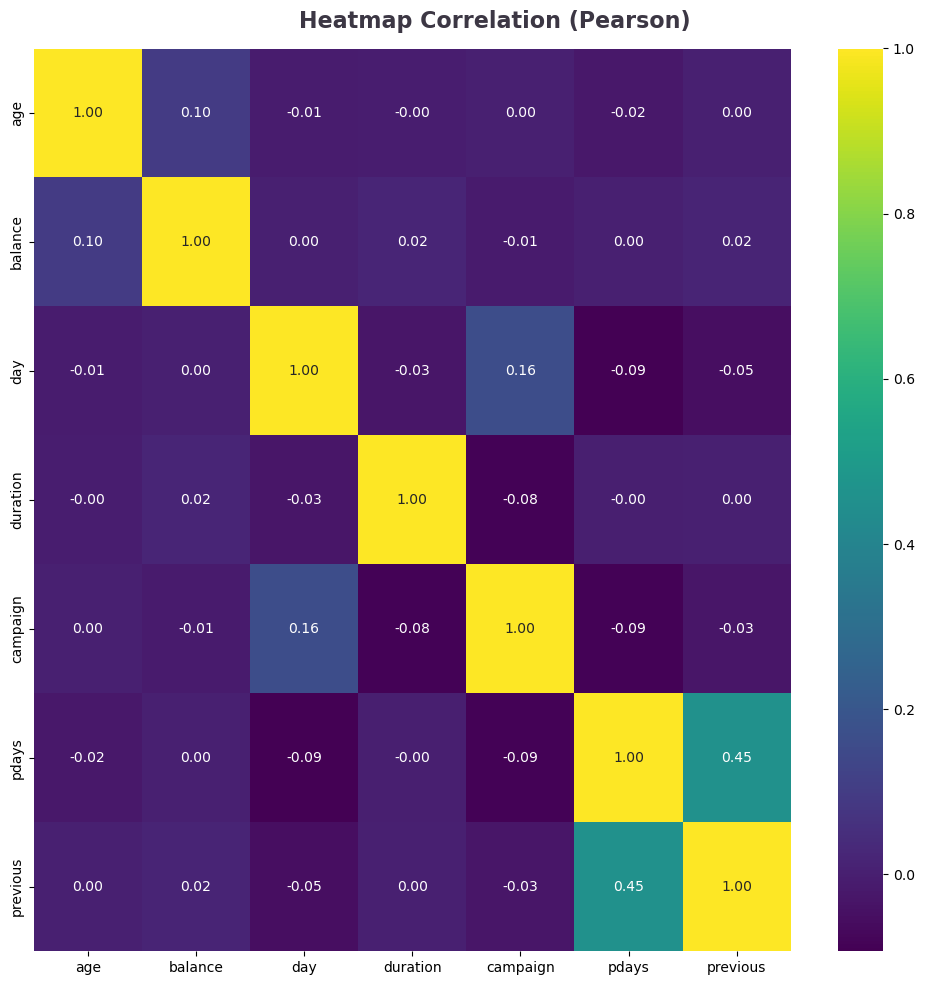

In [16]:
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.suptitle('Heatmap Correlation (Pearson)', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Tampilkan plot
plt.show()

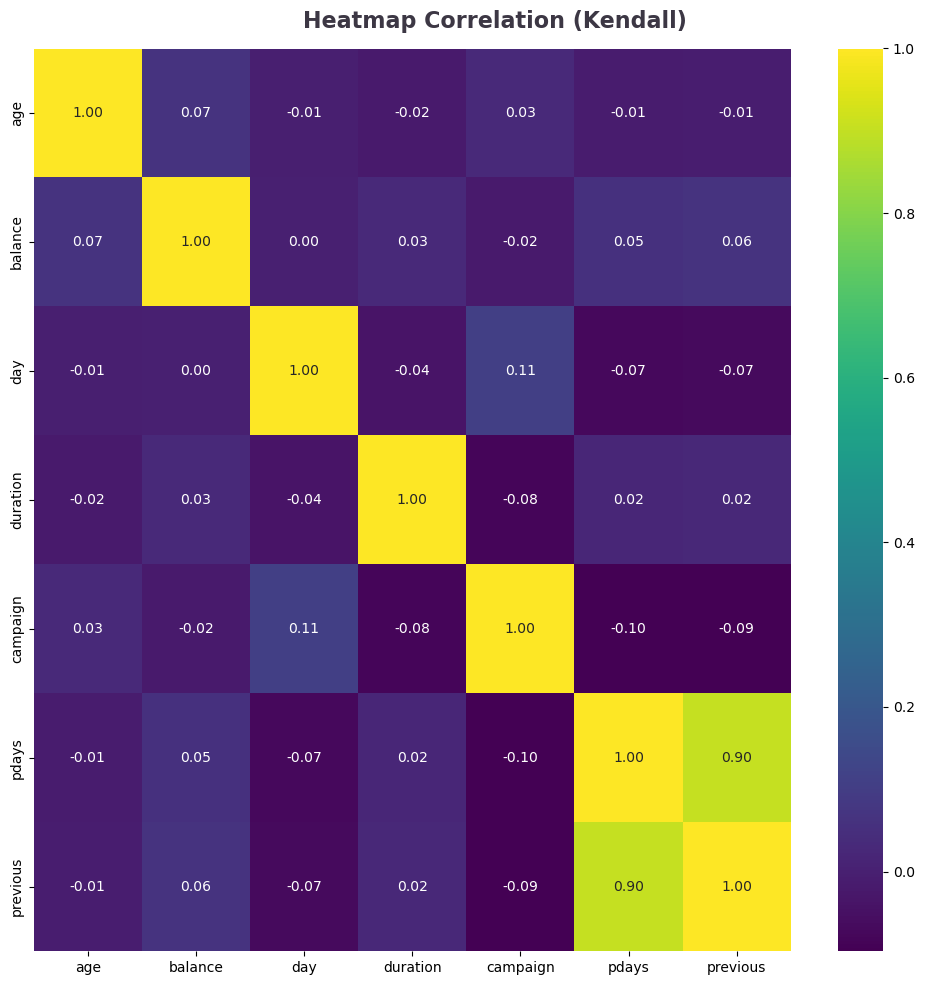

In [17]:
corr_matrix = df.corr(method='kendall')

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.suptitle('Heatmap Correlation (Kendall)', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Tampilkan plot
plt.show()

In [18]:
df_prep['poutcome'].replace({'unknown': 'never'}, inplace=True)
df_prep.drop(columns = ["month", "previous", "day", "pdays"], inplace = True)
print(df_prep)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  duration  campaign poutcome    y 

In [19]:
df_prep['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [20]:
# df_prep.drop(columns = ["month", "previous", "day", "pdays"], inplace = True)
# print(df_prep)

## Handling Outliers

In [21]:
# from scipy import stats

# # Define the list of features
# num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# print(f'Total Baris sebelum melakukan Handling Outlier = {len(df_prep)}')

# handling_outlier = np.array([True] * len(df_prep))

# for col in num_cols:
#     zscore = abs(stats.zscore(df_prep[col]))
#     handling_outlier = (zscore < 3) & handling_outlier
    
# df_prep = df_prep[handling_outlier] 

# print(f'Total Baris setelah melakukan Handling Outlier = {len(df_prep)}')

In [22]:
# plt.figure(figsize=(8, 6))
# plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# for i, col in enumerate(num_cols):
#     plt.subplot(4, 2, i+1)  
#     sns.boxplot(x=df_prep[col])
#     plt.ylabel(col)
# plt.tight_layout()
# plt.show()

# Feature Engineering

## Feature Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print(f'Dimensi data sebelum encoding adalah {df_prep.shape[0]} baris dan {df_prep.shape[1]} kolom')

# # Label Encoding untuk variabel ordinal
# label_cols = ['education', 'month', 'y']
# label_encoder = LabelEncoder()
# df_prep[label_cols] = df_prep[label_cols].apply(label_encoder.fit_transform)


Dimensi data sebelum encoding adalah 45211 baris dan 13 kolom


In [24]:
df_prep['default'] = df_prep['default'].map({'yes': 1, 'no': 0})
df_prep['housing'] = df_prep['housing'].map({'yes': 1, 'no': 0})
df_prep['loan'] = df_prep['loan'].map({'yes': 1, 'no': 0})
df_prep['contact'] = df_prep['contact'].map({'telephone': 1, 'cellular': 0, 'unknown':2})
df_prep['y'] = df_prep['y'].map({'yes': 1, 'no': 0})
df_prep

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,2,261,1,never,0
1,44,technician,single,secondary,0,29,1,0,2,151,1,never,0
2,33,entrepreneur,married,secondary,0,2,1,1,2,76,1,never,0
3,47,blue-collar,married,unknown,0,1506,1,0,2,92,1,never,0
4,33,unknown,single,unknown,0,1,0,0,2,198,1,never,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,0,977,3,never,1
45207,71,retired,divorced,primary,0,1729,0,0,0,456,2,never,1
45208,72,retired,married,secondary,0,5715,0,0,0,1127,5,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,1,508,4,never,0


In [25]:
encoder = OneHotEncoder(sparse=False)
for col in ['job', 'marital', 'education', 'poutcome']:
    onehots = pd.get_dummies(df_prep[col], prefix=col)
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)

In [26]:
df_prep.head()

,age,default,balance,housing,loan,contact,duration,campaign,y,job_admin.,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_never,poutcome_other,poutcome_success
0,58,0,2143,1,0,2,261,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,44,0,29,1,0,2,151,1,0,0,...,0,1,0,1,0,0,0,1,0,0
2,33,0,2,1,1,2,76,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,47,0,1506,1,0,2,92,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,33,0,1,0,0,2,198,1,0,0,...,0,1,0,0,0,1,0,1,0,0


### Feature Transformation

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scaling using normalization
df_prep['age'] = MinMaxScaler().fit_transform(df_prep['age'].values.reshape(-1, 1))
# scaling using standardization
df_prep['balance'] = RobustScaler().fit_transform(df_prep['balance'].values.reshape(-1, 1))
df_prep['duration'] = RobustScaler().fit_transform(df_prep['duration'].values.reshape(-1, 1))
df_prep['campaign'] = RobustScaler().fit_transform(df_prep['campaign'].values.reshape(-1, 1))

## Split Train & Test Set

In [28]:
X = df_prep.drop(['y'], axis=1)
y = df_prep['y']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) #Splitting 

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36168, 31) (9043, 31) (36168,) (9043,)


## Handling Imbalance Data

In [31]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# sm = SMOTE(random_state = 42)
# X_train, y_train= sm.fit_resample(X_train, y_train)

In [32]:
y_train.value_counts()

0    31970
1     4198
Name: y, dtype: int64

In [33]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve

In [34]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [35]:
# Evaluation 1.
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Cross Validation mean:',(cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1, scoring = 'accuracy').mean()))

[[7766  738]
 [ 186  353]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.32      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

Accuracy: 0.8978215194072764
Precision: 0.6549165120593692
Recall: 0.3235563703024748


Cross Validation mean: 0.9013216656172343


In [36]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

In [37]:
# Evaluation 1.
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Cross Validation mean:',(cross_val_score(adb, X_train, y_train, cv=5, n_jobs=-1, scoring = 'accuracy').mean()))

[[7705  693]
 [ 247  398]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.36      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043

Accuracy: 0.8960521950680084
Precision: 0.6170542635658914
Recall: 0.36480293308890926


Cross Validation mean: 0.8997456669679078


In [38]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

In [39]:
# Evaluation 1.
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Cross Validation mean:',(cross_val_score(xgb_classifier, X_train, y_train, cv=5, n_jobs=-1, scoring = 'accuracy').mean()))

[[7672  659]
 [ 280  432]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.61      0.40      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.68      0.71      9043
weighted avg       0.88      0.90      0.89      9043

Accuracy: 0.8961627778392126
Precision: 0.6067415730337079
Recall: 0.39596700274977087


Cross Validation mean: 0.8987227656425729


In [40]:
ROS = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ROS, y_train_ROS = ROS.fit_resample(X_train, y_train)
np.bincount(y_train_ROS)

array([31970, 31970], dtype=int64)

In [41]:
# Second test of LR model with oversampling
logreg_oversampling = LogisticRegression(solver='liblinear')
logreg_oversampling.fit(X_train_ROS, y_train_ROS)
y_pred_oversampling = logreg_oversampling.predict(X_test)

In [42]:
# Evaluation 2.
print(confusion_matrix(y_pred_oversampling, y_test))
print(classification_report(y_test, y_pred_oversampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_oversampling))
print("Precision:",metrics.precision_score(y_test, y_pred_oversampling))
print("Recall:",metrics.recall_score(y_test, y_pred_oversampling))
print('Cross Validation mean:',(cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[6619  221]
 [1333  870]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7952
           1       0.39      0.80      0.53      1091

    accuracy                           0.83      9043
   macro avg       0.68      0.81      0.71      9043
weighted avg       0.90      0.83      0.85      9043

Accuracy: 0.8281543735486011
Precision: 0.3949160236041761
Recall: 0.7974335472043996
Cross Validation mean: 0.9013216656172343


In [43]:
# Second test of LR model with oversampling
adb_oversampling = XGBClassifier(random_state=42)
adb_oversampling.fit(X_train_ROS, y_train_ROS)
y_pred_oversampling = adb_oversampling.predict(X_test)

In [44]:
# Evaluation 2.
print(confusion_matrix(y_pred_oversampling, y_test))
print(classification_report(y_test, y_pred_oversampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_oversampling))
print("Precision:",metrics.precision_score(y_test, y_pred_oversampling))
print("Recall:",metrics.recall_score(y_test, y_pred_oversampling))
print('Cross Validation mean:',(cross_val_score(adb, X_train, y_train, cv=5, scoring = 'accuracy').mean()))

[[6748  260]
 [1204  831]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7952
           1       0.41      0.76      0.53      1091

    accuracy                           0.84      9043
   macro avg       0.69      0.81      0.72      9043
weighted avg       0.90      0.84      0.86      9043

Accuracy: 0.8381068229569834
Precision: 0.40835380835380836
Recall: 0.7616865261228231


Cross Validation mean: 0.8997456669679078


In [45]:
# Second test of LR model with oversampling
xgb_oversampling = XGBClassifier(random_state=42)
xgb_oversampling.fit(X_train_ROS, y_train_ROS)
y_pred_oversampling = xgb_oversampling.predict(X_test)

In [46]:
# Evaluation 2.
print(confusion_matrix(y_pred_oversampling, y_test))
print(classification_report(y_test, y_pred_oversampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_oversampling))
print("Precision:",metrics.precision_score(y_test, y_pred_oversampling))
print("Recall:",metrics.recall_score(y_test, y_pred_oversampling))
print('Cross Validation mean:',(cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring = 'accuracy').mean()))

[[6748  260]
 [1204  831]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7952
           1       0.41      0.76      0.53      1091

    accuracy                           0.84      9043
   macro avg       0.69      0.81      0.72      9043
weighted avg       0.90      0.84      0.86      9043

Accuracy: 0.8381068229569834
Precision: 0.40835380835380836
Recall: 0.7616865261228231


Cross Validation mean: 0.8987227656425729


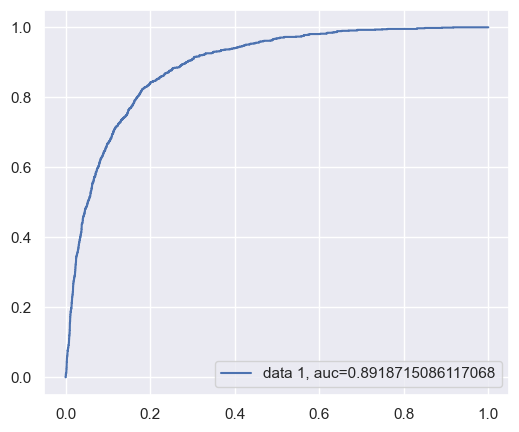

In [47]:
y_pred_proba = logreg_oversampling.predict_proba(X_test)[:,1]
sns.set(rc = {'figure.figsize':(6, 5)})
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Penambahan oversampling memberikan peningkatan signifikan pada model Regresi Logistik, dengan akurasi mencapai 82,81%. Recall menunjukkan bahwa 79,74% dari kasus positif berhasil diidentifikasi dengan benar, yang telah terbukti sebagai metode terbaik untuk mengatasi ketidakseimbangan data. Selain itu, berhasil dicapai skor cross-validation sebesar 90,13%.